<div class="alert alert-block alert-success">

# <center> CS587 - Assignment 5 (Part I) </center>
## <center> Tracking and Improving the Sofwtare Project Quality </center>
## <center> Defect Removal Effectiveness </center>
  <center> Jinchen Tang </center>  
  <center> A20416525 </center>  

</div>

<div class="alert alert-block alert-danger">
    
### Deliverables: 
- Submit a single ZIP file for both Part 1 & Part 2 that has the folowing items:
    1. Your PDF document for the analysis report. 
    2. Your IPYNB script with the name DRE_QM.ipynb that has your source code and output for the requirements listed 
    2. Your HTML/PDF document that has your source code and output for the requirements listed 

<br>
    
</div>


<div class="alert alert-info">

     
## High Level Description:

In this assignment, you will execute 5 experiments to assess the quality of the sofwtare project using different methods utilized by the project manager to track and improve the software project quality.
    
The project manager, attempted to utlize the following methods to improve the quality of the software product delivered in  the different releases of the software product:
1. Increase the duration of the task by 10%
2. Increase the number of reviewers on the review task from 4 to 5 

    
</div>




<hr style="border:5px solid orange"> </hr>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



<div class="alert alert-info">   
    
### Read the DRE data Matrix from a CSV file or JSON file
    
</div>

In [60]:
matrix_test = pd.read_excel('Release_test_Matrix_Data.xlsx', index_col = 0)
matrix_test

Requirements  Analysis  Design  Coding  \
Detection Phase/Origination Phase                                           
Requirements                                 58       NaN     NaN     NaN   
Analysis                                     39      55.0     NaN     NaN   
Design                                       82      51.0    82.0     NaN   
Coding                                       77      21.0    61.0   269.0   
Unit Testing                                 19      35.0     8.0   185.0   
Integration Testing                           7      15.0    21.0    27.0   
System Testing                               14      21.0    19.0    43.0   
Field                                        12       3.0    15.0    37.0   

                                   Unit Testing  Integration Testing  \
Detection Phase/Origination Phase                                      
Requirements                                NaN                  NaN   
Analysis                                    NaN                  NaN   
Design                                      NaN                  NaN   
Coding                                      NaN                  NaN   
Unit Testing                               31.0                  NaN   
Integration Testing                         NaN                 17.0   
System Testing                              NaN                  NaN   
Field                                       NaN                  NaN   

                                   System Testing  Field  
Detection Phase/Origination Phase                         
Requirements                                  NaN    NaN  
Analysis                                      NaN    NaN  
Design                                        NaN    NaN  
Coding                                        NaN    NaN  
Unit Testing                                  NaN    NaN  
Integration Testing                           NaN    NaN  
System Testing                               15.0    NaN  
Field                                         NaN    7.0

<div class="alert alert-info">  
    
### Create a stacked bar chart to plot the counts of the defects detection phase (Y-axis) for the origination phases (X-axis)

</div>

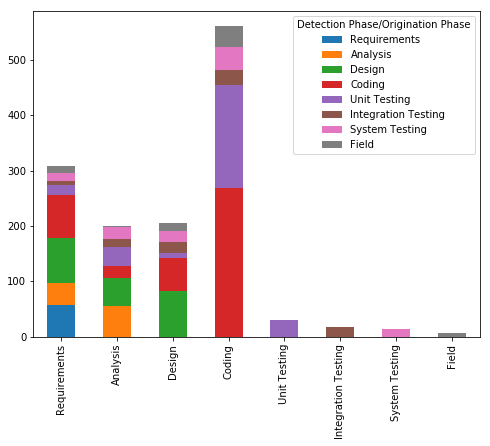

In [97]:
# Your code output should look similar to the following graph below:
fig, ax = plt.subplots(figsize=(8, 6))
matrix_test.T.plot.bar(stacked=True,ax=ax)




<div class="alert alert-info">   
    
### Create the functions to calculate the defect removal effectiveness for every phase & the overall defect removal effectiveness

- Defect Removal Effectiveness for development task = (Defects removed in current step / (Defects existing on step entry + Defects injected in current step)) * 100%

- Defect Removal Effectiveness for testing task = (Defects removed in current phase / (Defects removed in current phase + Defects removed in subsequent phases)) * 100%

    
</div>

In [99]:
# define the function
def get_DRE(matrix_test):
    Release_R1 = matrix_test.copy()
    # sum by columns
    Release_R1['Detected'] = matrix_test.sum(axis = 1).to_numpy()
    Release_R1['Injected'] = matrix_test.sum(axis = 0).to_numpy()
    escaped = []
    for i in range(8):
        value = sum(Release_R1['Injected'].iloc[:i+1]) - sum(Release_R1['Detected'].iloc[:i+1])
        escaped.append(value)
    Release_R1['Escaped'] = escaped

    DefectsOnStepEntry = []
    for i in range(8):
        value = sum(Release_R1['Injected'].iloc[:i]) - sum(Release_R1['Detected'].iloc[:i])
        DefectsOnStepEntry.append(value)
    Release_R1['DefectsOnStepEntry'] = DefectsOnStepEntry

    DRE_list = list(100*Release_R1['Detected'].iloc[:4].to_numpy()/(Release_R1['Injected'].iloc[:4].to_numpy() + Release_R1['DefectsOnStepEntry'].iloc[:4].to_numpy())) 
    
    for i in range(4,7):
        value = 100* Release_R1['Detected'].iloc[i] /sum( Release_R1['Detected'].iloc[i:])
        DRE_list.append(value)
    DRE_list.append(np.nan)
    Release_R1['DRE'] = DRE_list
    return Release_R1
DRE_matrix = get_DRE(matrix_test)
DRE_matrix

Requirements  Analysis  Design  Coding  \
Detection Phase/Origination Phase                                           
Requirements                                 58       NaN     NaN     NaN   
Analysis                                     39      55.0     NaN     NaN   
Design                                       82      51.0    82.0     NaN   
Coding                                       77      21.0    61.0   269.0   
Unit Testing                                 19      35.0     8.0   185.0   
Integration Testing                           7      15.0    21.0    27.0   
System Testing                               14      21.0    19.0    43.0   
Field                                        12       3.0    15.0    37.0   

                                   Unit Testing  Integration Testing  \
Detection Phase/Origination Phase                                      
Requirements                                NaN                  NaN   
Analysis                                    NaN                  NaN   
Design                                      NaN                  NaN   
Coding                                      NaN                  NaN   
Unit Testing                               31.0                  NaN   
Integration Testing                         NaN                 17.0   
System Testing                              NaN                  NaN   
Field                                       NaN                  NaN   

                                   System Testing  Field  Detected  Injected  \
Detection Phase/Origination Phase                                              
Requirements                                  NaN    NaN      58.0     308.0   
Analysis                                      NaN    NaN      94.0     201.0   
Design                                        NaN    NaN     215.0     206.0   
Coding                                        NaN    NaN     428.0     561.0   
Unit Testing                                  NaN    NaN     278.0      31.0   
Integration Testing                           NaN    NaN      87.0      17.0   
System Testing                               15.0    NaN     112.0      15.0   
Field                                         NaN    7.0      74.0       7.0   

                                   Escaped  DefectsOnStepEntry        DRE  
Detection Phase/Origination Phase                                          
Requirements                         250.0                 0.0  18.831169  
Analysis                             357.0               250.0  20.842572  
Design                               348.0               357.0  38.188277  
Coding                               481.0               348.0  47.084708  
Unit Testing                         234.0               481.0  50.453721  
Integration Testing                  164.0               234.0  31.868132  
System Testing                        67.0               164.0  60.215054  
Field                                  0.0                67.0        NaN

In [214]:
# Your code output should look similar to the following:


Detection Phase/Origination Phase  Requirements  Analysis  Design  Coding  \
0                      Requirements            58       NaN     NaN     NaN   
1                          Analysis            39      55.0     NaN     NaN   
2                            Design            82      51.0    82.0     NaN   
3                            Coding            77      21.0    61.0   269.0   
4                      Unit Testing            19      35.0     8.0   185.0   
5               Integration Testing             7      15.0    21.0    27.0   
6                    System Testing            14      21.0    19.0    43.0   
7                             Field            12       3.0    15.0    37.0   

   Unit Testing  Integration Testing  System Testing  Field  Detected  \
0           NaN                  NaN             NaN    NaN      58.0   
1           NaN                  NaN             NaN    NaN      94.0   
2           NaN                  NaN             NaN    NaN     215.0   
3           NaN                  NaN             NaN    NaN     428.0   
4          31.0                  NaN             NaN    NaN     278.0   
5           NaN                 17.0             NaN    NaN      87.0   
6           NaN                  NaN            15.0    NaN     112.0   
7           NaN                  NaN             NaN    7.0      74.0   

   Injected  Escaped  DefectsOnStepEntry        DRE  
0     308.0    250.0                 0.0  18.831169  
1     201.0    357.0               250.0  20.842572  
2     206.0    348.0               357.0  38.188277  
3     561.0    481.0               348.0  47.084708  
4      31.0    234.0               481.0  50.453721  
5      17.0    164.0               234.0  31.868132  
6      15.0     67.0               164.0  60.215054  
7       7.0      0.0                67.0        NaN

### Overall DRE

In [100]:
# define the function
def get_allDRE(DRE_matrix):
    return (1-DRE_matrix['Detected'].iloc[-1]/sum(DRE_matrix['Detected'])) *100
get_allDRE(DRE_matrix)    

94.50222882615155

In [216]:
# Your code output should look similar to the following:


94.50222882615155


# Release R1

In [62]:
matrix_R1 = pd.read_excel('Release_R1_Matrix_Data.xlsx', index_col = 0)
matrix_R1

Requirements  Analysis  Design  Coding  \
Detection Phase/Origination Phase                                           
Requirements                                 62       NaN     NaN     NaN   
Analysis                                     43      49.0     NaN     NaN   
Design                                       86      51.0    78.0     NaN   
Coding                                       81      21.0    61.0   258.0   
Unit Testing                                 23      35.0     8.0   185.0   
Integration Testing                          11      15.0    21.0    27.0   
System Testing                               18      21.0    19.0    43.0   
Field                                        16       3.0    15.0    37.0   

                                   Unit Testing  Integration Testing  \
Detection Phase/Origination Phase                                      
Requirements                                NaN                  NaN   
Analysis                                    NaN                  NaN   
Design                                      NaN                  NaN   
Coding                                      NaN                  NaN   
Unit Testing                               29.0                  NaN   
Integration Testing                         NaN                 18.0   
System Testing                              NaN                  NaN   
Field                                       NaN                  NaN   

                                   System Testing  Field  
Detection Phase/Origination Phase                         
Requirements                                  NaN    NaN  
Analysis                                      NaN    NaN  
Design                                        NaN    NaN  
Coding                                        NaN    NaN  
Unit Testing                                  NaN    NaN  
Integration Testing                           NaN    NaN  
System Testing                               13.0    NaN  
Field                                         NaN    5.0

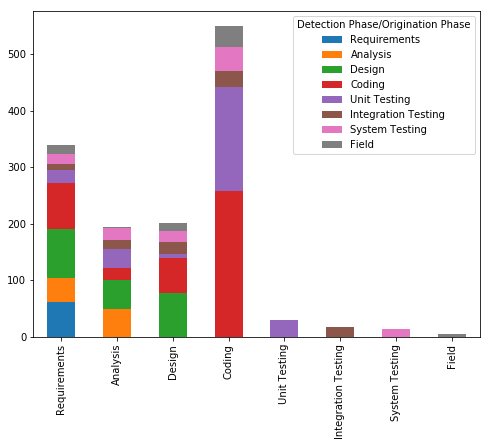

In [63]:
# Your code output should look similar to the following graph below:
fig, ax = plt.subplots(figsize=(8, 6))
matrix_R1.T.plot.bar(stacked=True,ax=ax)

In [91]:
matrix_R1_DRE = get_DRE(matrix_R1)
# matrix_R1_DRE.to_csv('matrix_R1_DRE.csv')
matrix_R1_DRE

Requirements  Analysis  Design  Coding  \
Detection Phase/Origination Phase                                           
Requirements                                 62       NaN     NaN     NaN   
Analysis                                     43      49.0     NaN     NaN   
Design                                       86      51.0    78.0     NaN   
Coding                                       81      21.0    61.0   258.0   
Unit Testing                                 23      35.0     8.0   185.0   
Integration Testing                          11      15.0    21.0    27.0   
System Testing                               18      21.0    19.0    43.0   
Field                                        16       3.0    15.0    37.0   

                                   Unit Testing  Integration Testing  \
Detection Phase/Origination Phase                                      
Requirements                                NaN                  NaN   
Analysis                                    NaN                  NaN   
Design                                      NaN                  NaN   
Coding                                      NaN                  NaN   
Unit Testing                               29.0                  NaN   
Integration Testing                         NaN                 18.0   
System Testing                              NaN                  NaN   
Field                                       NaN                  NaN   

                                   System Testing  Field  Detected  Injected  \
Detection Phase/Origination Phase                                              
Requirements                                  NaN    NaN      62.0     340.0   
Analysis                                      NaN    NaN      92.0     195.0   
Design                                        NaN    NaN     215.0     202.0   
Coding                                        NaN    NaN     421.0     550.0   
Unit Testing                                  NaN    NaN     280.0      29.0   
Integration Testing                           NaN    NaN      92.0      18.0   
System Testing                               13.0    NaN     114.0      13.0   
Field                                         NaN    5.0      76.0       5.0   

                                   Escaped  DefectsOnStepEntry        DRE  
Detection Phase/Origination Phase                                          
Requirements                         278.0                 0.0  18.235294  
Analysis                             381.0               278.0  19.450317  
Design                               368.0               381.0  36.878216  
Coding                               497.0               368.0  45.860566  
Unit Testing                         246.0               497.0  49.822064  
Integration Testing                  172.0               246.0  32.624113  
System Testing                        71.0               172.0  60.000000  
Field                                  0.0                71.0        NaN

In [66]:
# overall DRE
get_allDRE(matrix_R1_DRE)

94.37869822485207

# Release R2

In [67]:
matrix_R2 = pd.read_excel('Release_R2_Matrix_Data.xlsx', index_col = 0)
matrix_R2

Requirements  Analysis  Design  Coding  \
Detection Phase/Origination Phase                                           
Requirements                                 88       NaN     NaN     NaN   
Analysis                                      9      81.0     NaN     NaN   
Design                                       48      31.0    99.0     NaN   
Coding                                       65       9.0    23.0   347.0   
Unit Testing                                  9      18.0     5.0    56.0   
Integration Testing                           7       5.0     6.0    17.0   
System Testing                               11       7.0     3.0    16.0   
Field                                         3       4.0     3.0     4.0   

                                   Unit Testing  Integration Testing  \
Detection Phase/Origination Phase                                      
Requirements                                NaN                  NaN   
Analysis                                    NaN                  NaN   
Design                                      NaN                  NaN   
Coding                                      NaN                  NaN   
Unit Testing                               17.0                  NaN   
Integration Testing                         NaN                  8.0   
System Testing                              NaN                  NaN   
Field                                       NaN                  NaN   

                                   System Testing  Field  
Detection Phase/Origination Phase                         
Requirements                                  NaN    NaN  
Analysis                                      NaN    NaN  
Design                                        NaN    NaN  
Coding                                        NaN    NaN  
Unit Testing                                  NaN    NaN  
Integration Testing                           NaN    NaN  
System Testing                                5.0    NaN  
Field                                         NaN    4.0

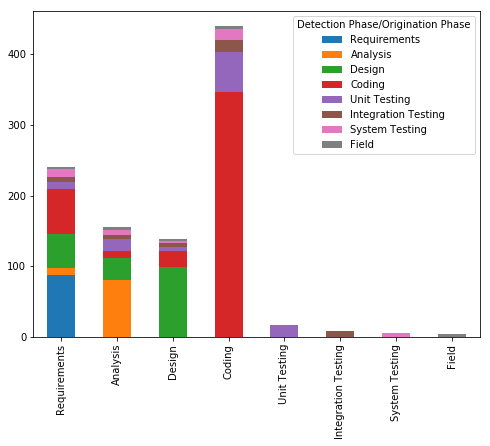

In [68]:
# Your code output should look similar to the following graph below:
fig, ax = plt.subplots(figsize=(8, 6))
matrix_R2.T.plot.bar(stacked=True,ax=ax)

In [69]:
matrix_R2_DRE = get_DRE(matrix_R2)
matrix_R2_DRE

Requirements  Analysis  Design  Coding  \
Detection Phase/Origination Phase                                           
Requirements                                 88       NaN     NaN     NaN   
Analysis                                      9      81.0     NaN     NaN   
Design                                       48      31.0    99.0     NaN   
Coding                                       65       9.0    23.0   347.0   
Unit Testing                                  9      18.0     5.0    56.0   
Integration Testing                           7       5.0     6.0    17.0   
System Testing                               11       7.0     3.0    16.0   
Field                                         3       4.0     3.0     4.0   

                                   Unit Testing  Integration Testing  \
Detection Phase/Origination Phase                                      
Requirements                                NaN                  NaN   
Analysis                                    NaN                  NaN   
Design                                      NaN                  NaN   
Coding                                      NaN                  NaN   
Unit Testing                               17.0                  NaN   
Integration Testing                         NaN                  8.0   
System Testing                              NaN                  NaN   
Field                                       NaN                  NaN   

                                   System Testing  Field  Detected  Injected  \
Detection Phase/Origination Phase                                              
Requirements                                  NaN    NaN      88.0     240.0   
Analysis                                      NaN    NaN      90.0     155.0   
Design                                        NaN    NaN     178.0     139.0   
Coding                                        NaN    NaN     444.0     440.0   
Unit Testing                                  NaN    NaN     105.0      17.0   
Integration Testing                           NaN    NaN      43.0       8.0   
System Testing                                5.0    NaN      42.0       5.0   
Field                                         NaN    4.0      18.0       4.0   

                                   Escaped  DefectsOnStepEntry        DRE  
Detection Phase/Origination Phase                                          
Requirements                         152.0                 0.0  36.666667  
Analysis                             217.0               152.0  29.315961  
Design                               178.0               217.0  50.000000  
Coding                               174.0               178.0  71.844660  
Unit Testing                          86.0               174.0  50.480769  
Integration Testing                   51.0                86.0  41.747573  
System Testing                        14.0                51.0  70.000000  
Field                                  0.0                14.0        NaN

In [71]:
# overall DRE
get_allDRE(matrix_R2_DRE)

98.21428571428571

# Release R3 

In [72]:
matrix_R3 = pd.read_excel('Release_R3_Matrix_Data.xlsx', index_col = 0)
matrix_R3

Requirements  Analysis  Design  Coding  \
Detection Phase/Origination Phase                                           
Requirements                                 69       NaN     NaN     NaN   
Analysis                                     26      59.0     NaN     NaN   
Design                                       51      41.0    89.0     NaN   
Coding                                       69      11.0    38.0   289.0   
Unit Testing                                 14      30.0    15.0   134.0   
Integration Testing                          10      15.0    16.0    24.0   
System Testing                               13      16.0     5.0    33.0   
Field                                         8       7.0     9.0    17.0   

                                   Unit Testing  Integration Testing  \
Detection Phase/Origination Phase                                      
Requirements                                NaN                  NaN   
Analysis                                    NaN                  NaN   
Design                                      NaN                  NaN   
Coding                                      NaN                  NaN   
Unit Testing                               19.0                  NaN   
Integration Testing                         NaN                  9.0   
System Testing                              NaN                  NaN   
Field                                       NaN                  NaN   

                                   System Testing  Field  
Detection Phase/Origination Phase                         
Requirements                                  NaN    NaN  
Analysis                                      NaN    NaN  
Design                                        NaN    NaN  
Coding                                        NaN    NaN  
Unit Testing                                  NaN    NaN  
Integration Testing                           NaN    NaN  
System Testing                                9.0    NaN  
Field                                         NaN    6.0

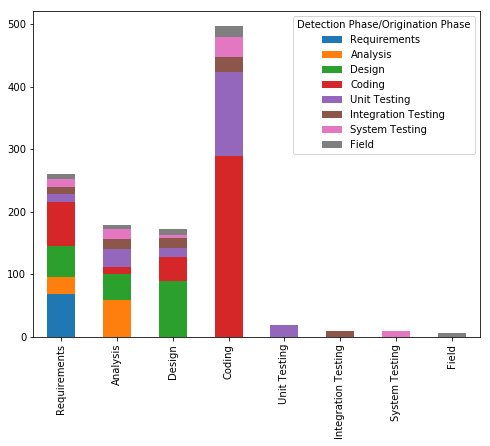

In [73]:
# Your code output should look similar to the following graph below:
fig, ax = plt.subplots(figsize=(8, 6))
matrix_R3.T.plot.bar(stacked=True,ax=ax)

In [74]:
matrix_R3_DRE = get_DRE(matrix_R3)
matrix_R3_DRE

Requirements  Analysis  Design  Coding  \
Detection Phase/Origination Phase                                           
Requirements                                 69       NaN     NaN     NaN   
Analysis                                     26      59.0     NaN     NaN   
Design                                       51      41.0    89.0     NaN   
Coding                                       69      11.0    38.0   289.0   
Unit Testing                                 14      30.0    15.0   134.0   
Integration Testing                          10      15.0    16.0    24.0   
System Testing                               13      16.0     5.0    33.0   
Field                                         8       7.0     9.0    17.0   

                                   Unit Testing  Integration Testing  \
Detection Phase/Origination Phase                                      
Requirements                                NaN                  NaN   
Analysis                                    NaN                  NaN   
Design                                      NaN                  NaN   
Coding                                      NaN                  NaN   
Unit Testing                               19.0                  NaN   
Integration Testing                         NaN                  9.0   
System Testing                              NaN                  NaN   
Field                                       NaN                  NaN   

                                   System Testing  Field  Detected  Injected  \
Detection Phase/Origination Phase                                              
Requirements                                  NaN    NaN      69.0     260.0   
Analysis                                      NaN    NaN      85.0     179.0   
Design                                        NaN    NaN     181.0     172.0   
Coding                                        NaN    NaN     407.0     497.0   
Unit Testing                                  NaN    NaN     212.0      19.0   
Integration Testing                           NaN    NaN      74.0       9.0   
System Testing                                9.0    NaN      76.0       9.0   
Field                                         NaN    6.0      47.0       6.0   

                                   Escaped  DefectsOnStepEntry        DRE  
Detection Phase/Origination Phase                                          
Requirements                         191.0                 0.0  26.538462  
Analysis                             285.0               191.0  22.972973  
Design                               276.0               285.0  39.606127  
Coding                               366.0               276.0  52.652005  
Unit Testing                         173.0               366.0  51.833741  
Integration Testing                  108.0               173.0  37.563452  
System Testing                        41.0               108.0  61.788618  
Field                                  0.0                41.0        NaN

In [81]:
# overall DRE
get_allDRE(matrix_R3_DRE)

95.91659426585578

# Release R4

In [76]:
matrix_R4= pd.read_excel('Release_R4_Matrix_Data.xlsx', index_col = 0)
matrix_R4

Requirements  Analysis  Design  Coding  \
Detection Phase/Origination Phase                                           
Requirements                                 77       NaN     NaN     NaN   
Analysis                                      9      57.0     NaN     NaN   
Design                                       48      31.0   107.0     NaN   
Coding                                       65       9.0    19.0   339.0   
Unit Testing                                  9      16.0     5.0    56.0   
Integration Testing                           7       5.0     6.0    17.0   
System Testing                               11       7.0     3.0    16.0   
Field                                         2       3.0     2.0     3.0   

                                   Unit Testing  Integration Testing  \
Detection Phase/Origination Phase                                      
Requirements                                NaN                  NaN   
Analysis                                    NaN                  NaN   
Design                                      NaN                  NaN   
Coding                                      NaN                  NaN   
Unit Testing                                9.0                  NaN   
Integration Testing                         NaN                  4.0   
System Testing                              NaN                  NaN   
Field                                       NaN                  NaN   

                                   System Testing  Field  
Detection Phase/Origination Phase                         
Requirements                                  NaN    NaN  
Analysis                                      NaN    NaN  
Design                                        NaN    NaN  
Coding                                        NaN    NaN  
Unit Testing                                  NaN    NaN  
Integration Testing                           NaN    NaN  
System Testing                                1.0    NaN  
Field                                         NaN    3.0

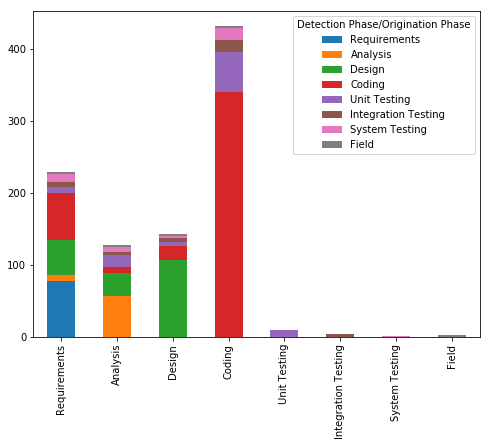

In [77]:
# Your code output should look similar to the following graph below:
fig, ax = plt.subplots(figsize=(8, 6))
matrix_R4.T.plot.bar(stacked=True,ax=ax)

In [79]:
matrix_R4_DRE = get_DRE(matrix_R4)
matrix_R4_DRE

Requirements  Analysis  Design  Coding  \
Detection Phase/Origination Phase                                           
Requirements                                 77       NaN     NaN     NaN   
Analysis                                      9      57.0     NaN     NaN   
Design                                       48      31.0   107.0     NaN   
Coding                                       65       9.0    19.0   339.0   
Unit Testing                                  9      16.0     5.0    56.0   
Integration Testing                           7       5.0     6.0    17.0   
System Testing                               11       7.0     3.0    16.0   
Field                                         2       3.0     2.0     3.0   

                                   Unit Testing  Integration Testing  \
Detection Phase/Origination Phase                                      
Requirements                                NaN                  NaN   
Analysis                                    NaN                  NaN   
Design                                      NaN                  NaN   
Coding                                      NaN                  NaN   
Unit Testing                                9.0                  NaN   
Integration Testing                         NaN                  4.0   
System Testing                              NaN                  NaN   
Field                                       NaN                  NaN   

                                   System Testing  Field  Detected  Injected  \
Detection Phase/Origination Phase                                              
Requirements                                  NaN    NaN      77.0     228.0   
Analysis                                      NaN    NaN      66.0     128.0   
Design                                        NaN    NaN     186.0     142.0   
Coding                                        NaN    NaN     432.0     431.0   
Unit Testing                                  NaN    NaN      95.0       9.0   
Integration Testing                           NaN    NaN      39.0       4.0   
System Testing                                1.0    NaN      38.0       1.0   
Field                                         NaN    3.0      13.0       3.0   

                                   Escaped  DefectsOnStepEntry        DRE  
Detection Phase/Origination Phase                                          
Requirements                         151.0                 0.0  33.771930  
Analysis                             213.0               151.0  23.655914  
Design                               169.0               213.0  52.394366  
Coding                               168.0               169.0  72.000000  
Unit Testing                          82.0               168.0  51.351351  
Integration Testing                   47.0                82.0  43.333333  
System Testing                        10.0                47.0  74.509804  
Field                                  0.0                10.0        NaN

In [80]:
# overall DRE
get_allDRE(matrix_R4_DRE)

98.62579281183932

# Release R5


In [87]:
matrix_R5= pd.read_excel('Release_R5_Matrix_Data.xlsx', index_col = 0)
matrix_R5

Requirements  Analysis  Design  Coding  \
Detection Phase/Origination Phase                                           
Requirements                                 61       NaN     NaN     NaN   
Analysis                                     26    4239.0     NaN     NaN   
Design                                       51      41.0    86.0     NaN   
Coding                                       69      11.0    34.0   267.0   
Unit Testing                                 14      30.0    15.0   134.0   
Integration Testing                           9      15.0    16.0    23.0   
System Testing                               13      16.0     5.0    33.0   
Field                                         7       6.0     8.0    16.0   

                                   Unit Testing  Integration Testing  \
Detection Phase/Origination Phase                                      
Requirements                                NaN                  NaN   
Analysis                                    NaN                  NaN   
Design                                      NaN                  NaN   
Coding                                      NaN                  NaN   
Unit Testing                               15.0                  NaN   
Integration Testing                         NaN                  6.0   
System Testing                              NaN                  NaN   
Field                                       NaN                  NaN   

                                   System Testing  Field  
Detection Phase/Origination Phase                         
Requirements                                  NaN    NaN  
Analysis                                      NaN    NaN  
Design                                        NaN    NaN  
Coding                                        NaN    NaN  
Unit Testing                                  NaN    NaN  
Integration Testing                           NaN    NaN  
System Testing                                4.0    NaN  
Field                                         NaN    4.0

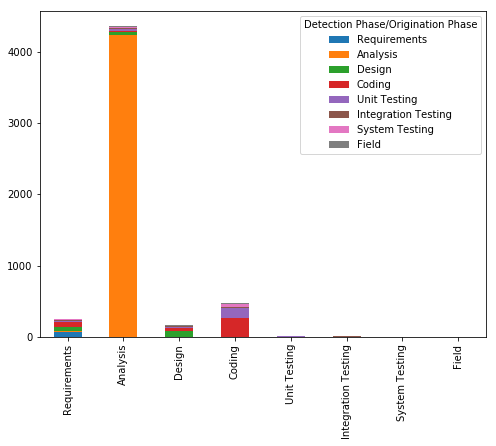

In [88]:
# Your code output should look similar to the following graph below:
fig, ax = plt.subplots(figsize=(8, 6))
matrix_R5.T.plot.bar(stacked=True,ax=ax)

In [89]:
matrix_R5_DRE = get_DRE(matrix_R5)
matrix_R5_DRE

Requirements  Analysis  Design  Coding  \
Detection Phase/Origination Phase                                           
Requirements                                 61       NaN     NaN     NaN   
Analysis                                     26    4239.0     NaN     NaN   
Design                                       51      41.0    86.0     NaN   
Coding                                       69      11.0    34.0   267.0   
Unit Testing                                 14      30.0    15.0   134.0   
Integration Testing                           9      15.0    16.0    23.0   
System Testing                               13      16.0     5.0    33.0   
Field                                         7       6.0     8.0    16.0   

                                   Unit Testing  Integration Testing  \
Detection Phase/Origination Phase                                      
Requirements                                NaN                  NaN   
Analysis                                    NaN                  NaN   
Design                                      NaN                  NaN   
Coding                                      NaN                  NaN   
Unit Testing                               15.0                  NaN   
Integration Testing                         NaN                  6.0   
System Testing                              NaN                  NaN   
Field                                       NaN                  NaN   

                                   System Testing  Field  Detected  Injected  \
Detection Phase/Origination Phase                                              
Requirements                                  NaN    NaN      61.0     250.0   
Analysis                                      NaN    NaN    4265.0    4358.0   
Design                                        NaN    NaN     178.0     164.0   
Coding                                        NaN    NaN     381.0     473.0   
Unit Testing                                  NaN    NaN     208.0      15.0   
Integration Testing                           NaN    NaN      69.0       6.0   
System Testing                                4.0    NaN      71.0       4.0   
Field                                         NaN    4.0      41.0       4.0   

                                   Escaped  DefectsOnStepEntry        DRE  
Detection Phase/Origination Phase                                          
Requirements                         189.0                 0.0  24.400000  
Analysis                             282.0               189.0  93.798109  
Design                               268.0               282.0  39.910314  
Coding                               360.0               268.0  51.417004  
Unit Testing                         167.0               360.0  53.470437  
Integration Testing                  104.0               167.0  38.121547  
System Testing                        37.0               104.0  63.392857  
Field                                  0.0                37.0        NaN

In [90]:
# overall DRE
get_allDRE(matrix_R5_DRE)

99.22260144103147